# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dabl #For data pipeline and visualization
import shap #XAI methodology


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import cross_val_score



In [ ]:
!pip install dabl

     |████████████████████████████████| 558 kB 4.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 4.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491653 sha256=dd73566623fa4f662fe5fbc16e3bc4c23e37be2e4082218c5e365b919db2f87c
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


# Import Dataset

In [ ]:
data = pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")

####  Data Acquired
Generated from Simulation Modelling of Wild Blueberry Pollination by an open
                                                                                            #source GAMA simulation platform V1.7 (http://gama-platform.org),
                                                                                            #using GAML modelling programming language  

#### Data description
A total of 77,700 simulations were conducted to achieve both an
extensive and intensive sampling effort and this resulted
in a dataset consisting of 777 records, each of which is an average of 100 simulation runs.

#### Data source location
Institution: The University of Maine
State/Region:  Maine
Country: USA


In [ ]:
data.head(10)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345453,2825.003738
6,6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [ ]:
data.drop('Row#', axis = 'columns', inplace = True) #dropping the 1st column, Row#

In [ ]:
data.head(10)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345453,2825.003738
6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [ ]:
len(data.index)

777

In [ ]:
data.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

# EDA (Exploratory Data Analysis)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

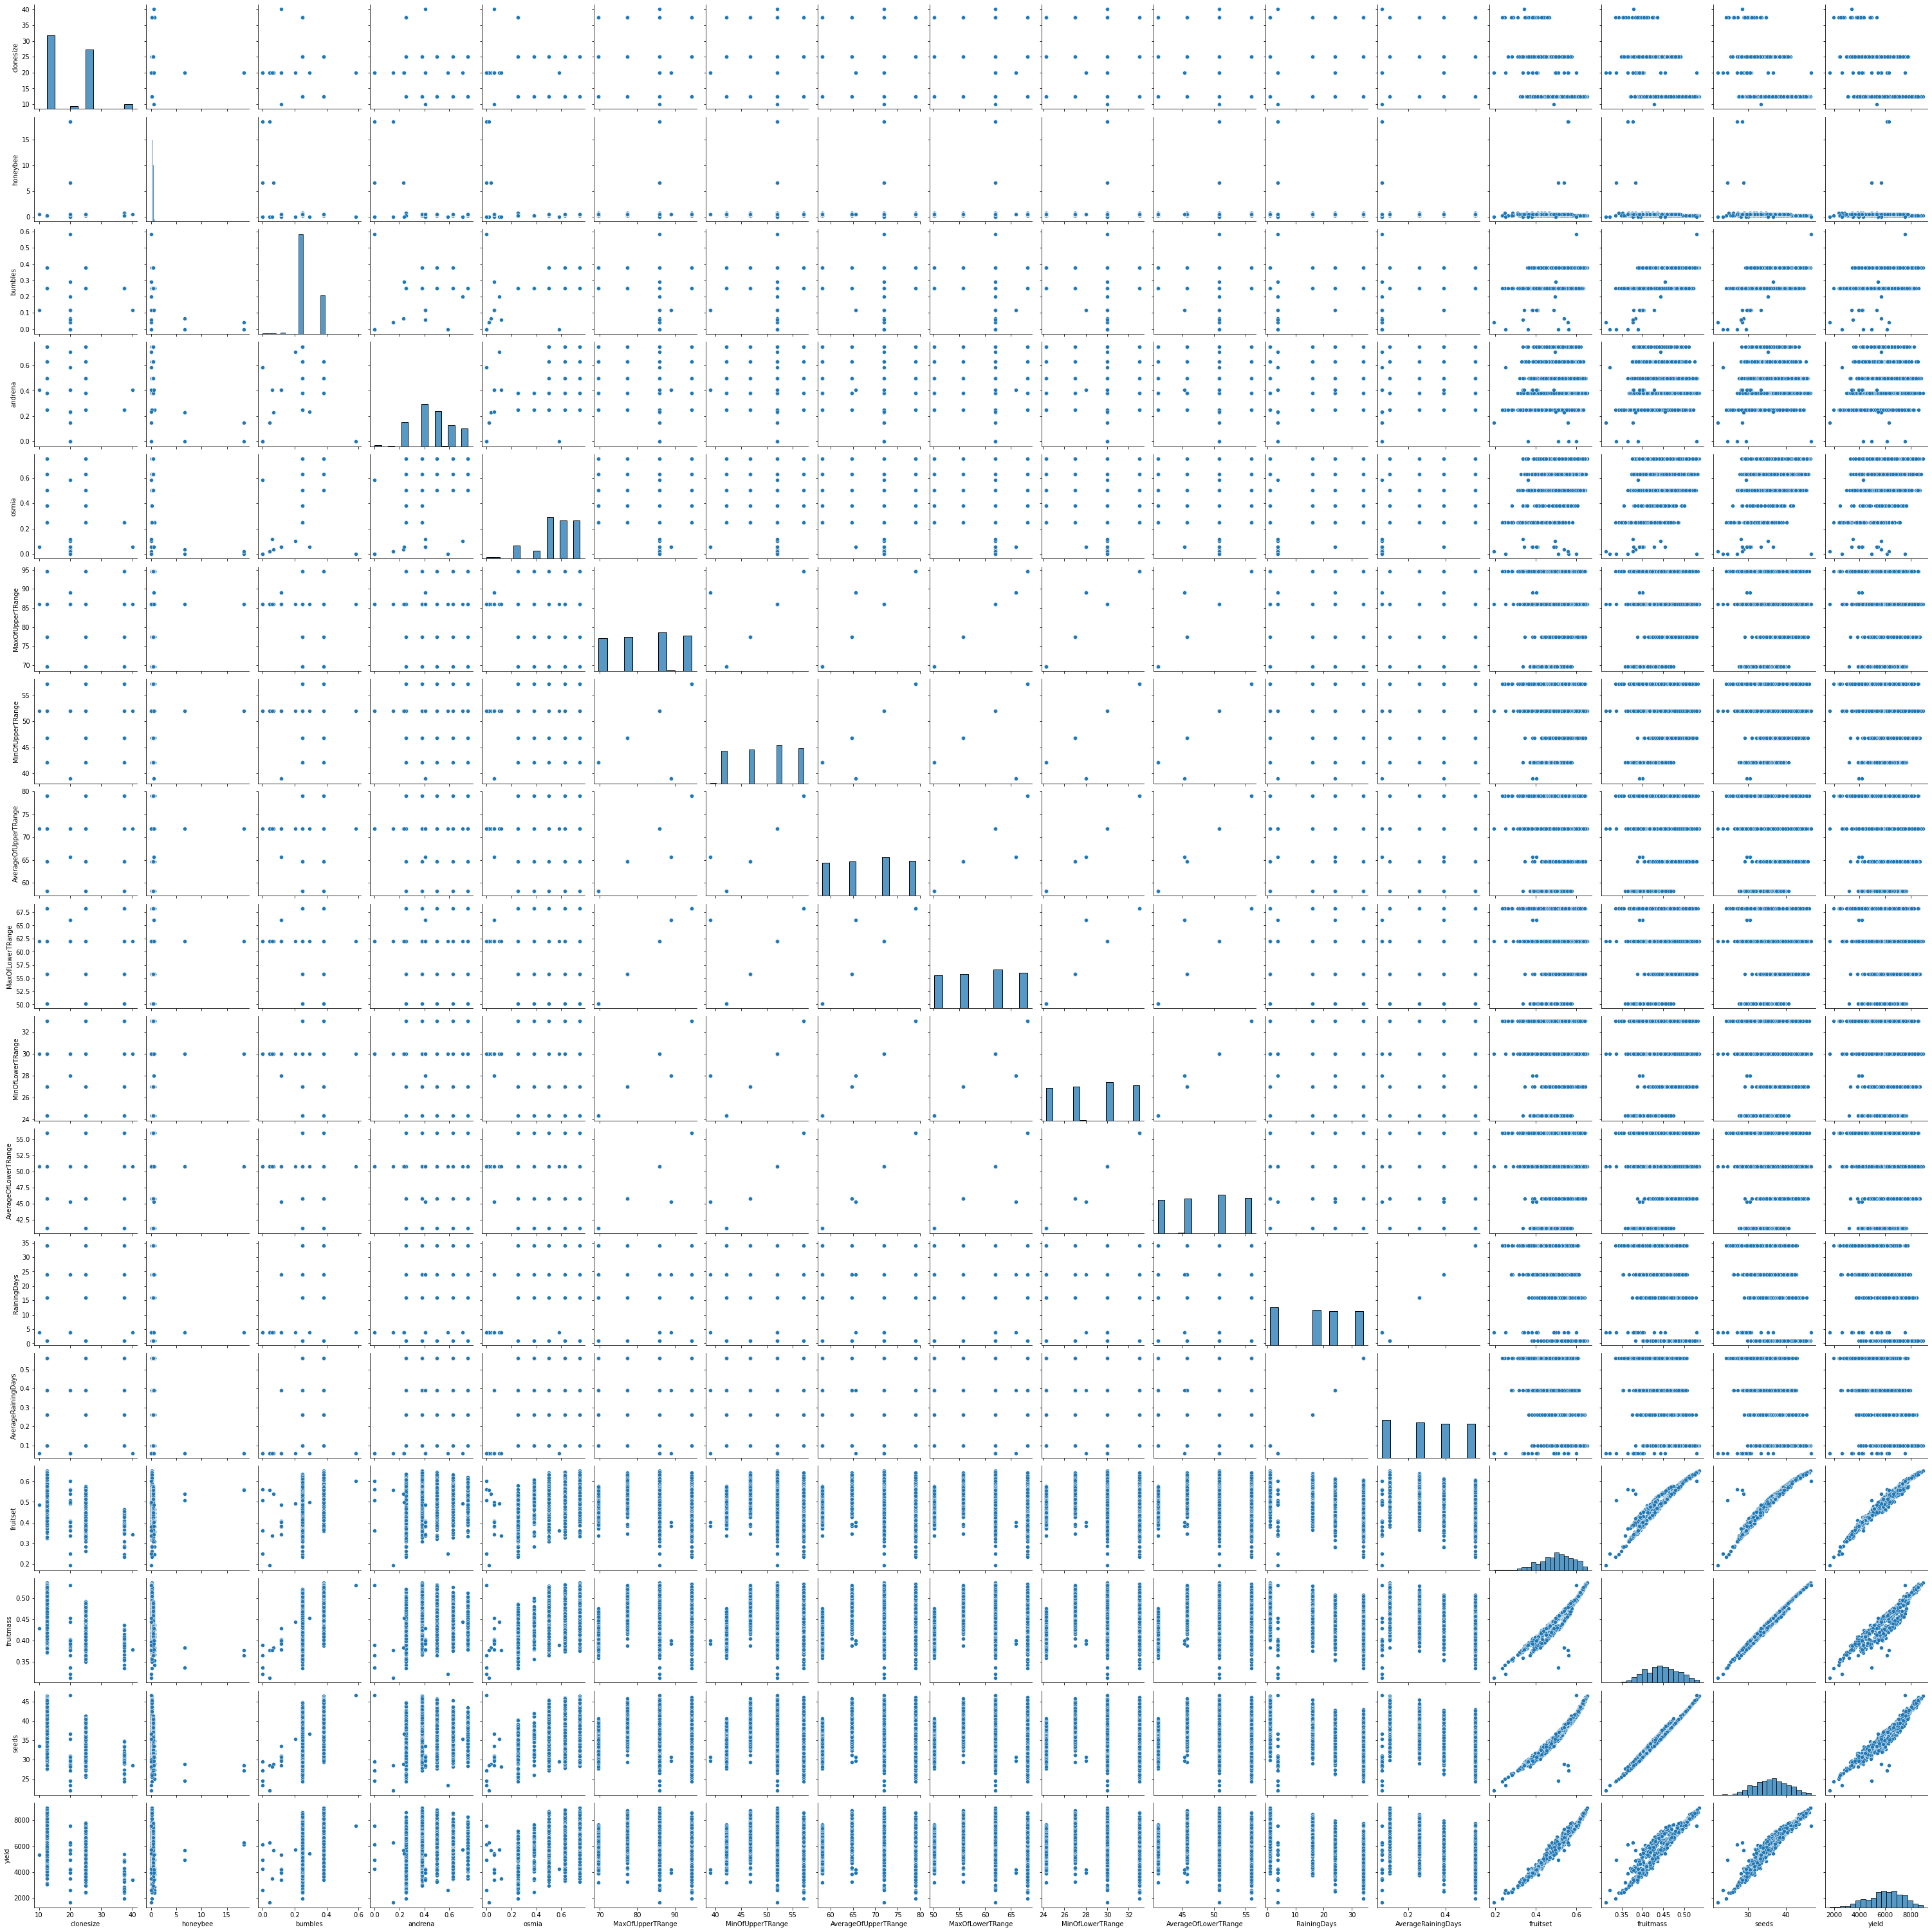

In [ ]:
sns.pairplot(data)
plt.show() #Data Visualiztion

Target looks like regression


Dropped 1 outliers in column bumbles.
Dropped 4 outliers in column honeybee.


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8141235b50>,
       dtype=object), None]

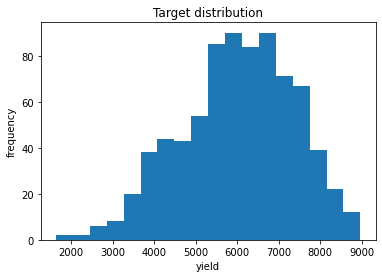

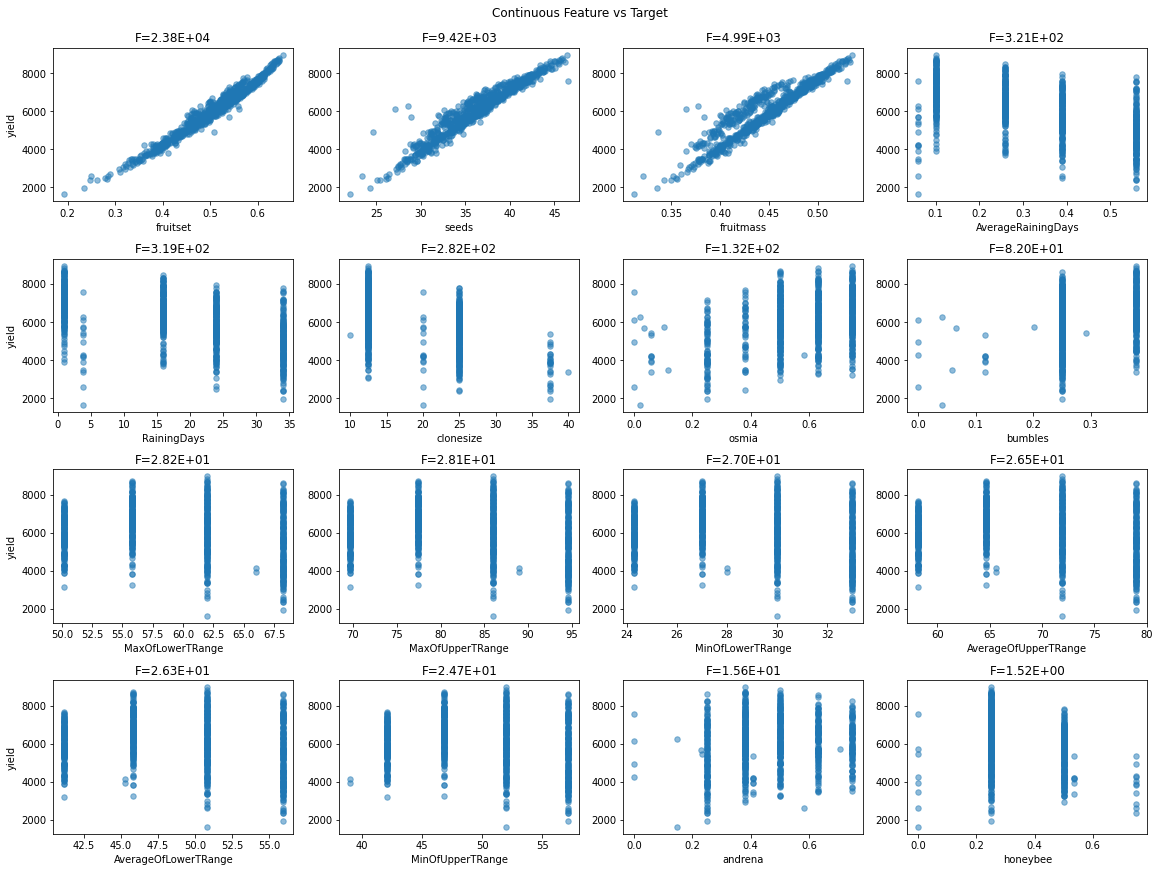

In [ ]:
dabl.plot(data, target_col = "yield") #Creating distribution figure for yield against all predictors/features

### Correlation

In [ ]:
plt.figure(figsize=(20,20))
corr = data.corr()
corr

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892
MaxOfUpperTRange,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075
MinOfUpperTRange,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883
AverageOfUpperTRange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
MaxOfLowerTRange,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439
MinOfLowerTRange,0.033768,0.026104,-0.016801,-0.025623,-0.056546,0.998842,0.996267,0.999944,0.998071,1.000000,0.999787,-0.002403,-0.004334,-0.126788,0.062093,-0.030727,-0.183339


<Figure size 1440x1440 with 0 Axes>

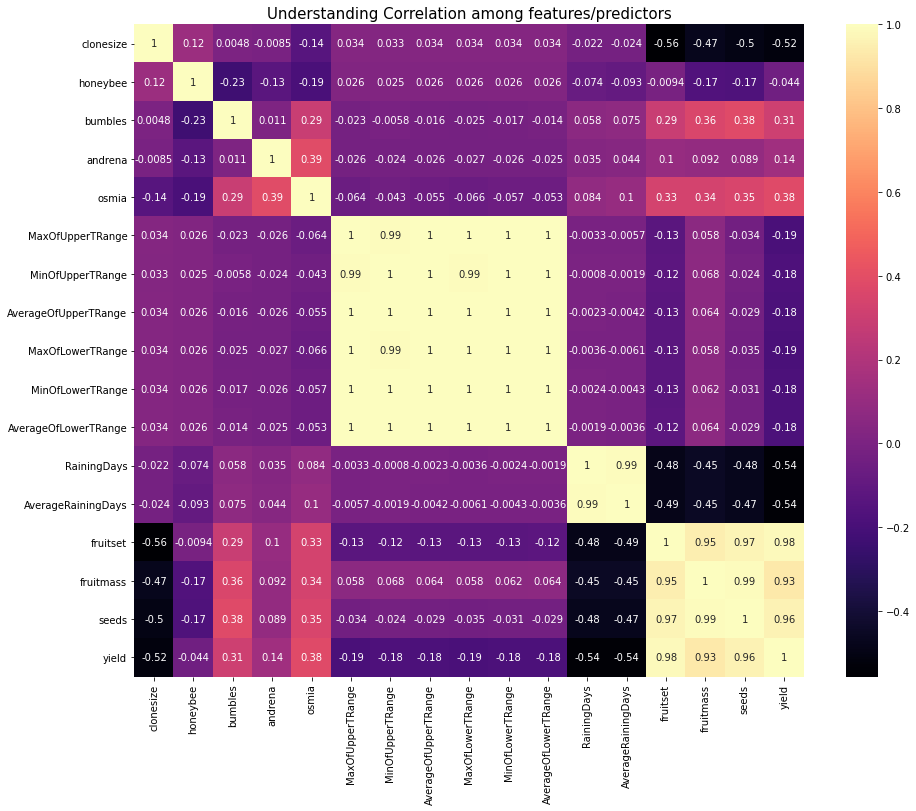

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot = True,  cmap ="magma")
plt.title('Understanding Correlation among features/predictors', fontsize=15)
plt.show()

### Outlier removal using InterQuartile Range


In [ ]:
q1 = data.quantile(0.25)
q2 = data.quantile(0.75)
iqr = q2 - q1 #The middle 50% of the data

In [ ]:
data = data[~((data < (q1 - 1.5 * iqr)) |(data > (q2 + 1.5 * iqr))).any(axis=1)]

In [ ]:
#Using IQR since data is left skewed

## Splitting the data into Training Data and Testing Data

In [ ]:
data.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
X = data[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]

In [ ]:
X.shape

(752, 16)

In [ ]:
y = data['yield']

In [ ]:
y.shape

(752,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [ ]:
X_train.shape

(601, 16)

In [ ]:
X_test.shape

(151, 16)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train) #Baseline Model

LinearRegression()

In [ ]:
y_reg_pred = reg.predict(X_test)

In [ ]:
print(y_reg_pred)

[7451.0625     6108.27490234 6397.24316406 8076.77441406 5749.4765625
 6538.01806641 7834.38134766 7854.33642578 4204.8125     6164.98486328
 5422.46630859 4777.56201172 6577.32177734 6607.58349609 6108.71826172
 7403.17480469 7063.59863281 7186.2890625  7647.66015625 5174.45507812
 3284.10839844 6252.49169922 4393.16699219 4437.49804688 4680.92773438
 5559.51464844 8020.33154297 5461.12060547 5839.77783203 6262.85205078
 7317.40722656 6857.4609375  7257.91308594 4914.42822266 4375.95507812
 5397.08203125 6171.19677734 4568.54052734 7472.78369141 5971.76123047
 8181.69433594 8606.81054688 8722.48242188 7778.96484375 7472.88232422
 5653.51953125 4301.94726562 5646.24707031 7789.93652344 3632.3046875
 8703.28076172 4212.36816406 7223.72167969 5376.49609375 7222.640625
 6551.51464844 4550.61621094 5274.12597656 6531.77099609 6441.51611328
 5890.33300781 6798.22167969 7110.19921875 4944.49511719 4479.47314453
 6830.78759766 4889.09765625 6141.72607422 4916.5546875  6186.02490234
 6901.7368

#### There are 3 main metrics for model evaluation in regression:
R Square/Adjusted R Square

Mean Square Error(MSE)/Root Mean Square Error(RMSE)

Mean Absolute Error(MAE)

# Random Forest Regression

### Modeling the Data and Evaluating the model

In [ ]:
# # params = {
#     'n_estimators' : [25, 50, 75, 100, 150, 200], # Number of trees in the RF
# }
# rfreg = GridSearchCV(RandomForestRegressor(random_state = 40), params) # Exhaustive search over specified parameter values for an estimator.
                                                                    # The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.


rfreg = RandomForestRegressor(n_estimators = 100)
rfreg.fit(X_train, y_train)
scores_rf= cross_val_score(rfreg, X, y, cv=5)

Y_pred_rf = rfreg.predict(X_test)

rmse_rf = np.sqrt(np.mean((y_test - Y_pred_rf)**2)) #Calculating Root mean square Error
r2_rf = r2_score(Y_pred_rf, y_test) #Calculating Root Squared
MAE_rf = mean_absolute_error(Y_pred_rf, y_test) #Calculating Mean Absolute Error

print("%0.4f accuracy with a standard deviation of %0.3f" % (scores_rf.mean(), scores_rf.std()))


NameError: ignored

# XGBoost

### Modeling the Data and Evaluating the model

In [ ]:
regressor = XGBRegressor(n_estimators = 100)

regressor.fit(X_train, y_train)
scores_xg= cross_val_score(regressor, X, y, cv=5)

Y_pred_xg = regressor.predict(X_test)

rmse_xg = np.sqrt(np.mean((y_test - Y_pred_xg)**2))
r2_xg = r2_score(Y_pred_xg, y_test)
MAE_xg = mean_absolute_error(Y_pred_xg, y_test)


print("%0.4f accuracy with a standard deviation of %0.3f" % (scores_xg.mean(), scores_xg.std()))


NameError: ignored

# Gradient Boosting

### Modeling the Data and Evaluating the model

In [ ]:
Gradient_reg = GradientBoostingRegressor()

Gradient_reg.fit(X_train, y_train)
scores_grad= cross_val_score(Gradient_reg, X, y, cv=5)

Y_pred_grad = Gradient_reg.predict(X_test)

rmse_grad = np.sqrt(np.mean((y_test - Y_pred_grad)**2))
r2_grad = r2_score(Y_pred_xg, y_test)
MAE_grad = mean_absolute_error(Y_pred_grad, y_test)

print("%0.4f accuracy with a standard deviation of %0.3f" % (scores_grad.mean(), scores_grad.std()))


NameError: ignored

# Creating a dataframe for each Machine learning algorithm along with the metrics


In [ ]:
model_frame = {'Model': ['RandomForestRegression', 'XGBoostRegression', 'GradientBoostRegression'],
               'R Square/Adjusted R Square': [r2_rf, r2_xg, r2_grad],
                'Root Mean Square Error':[rmse_rf, rmse_xg, rmse_grad],
              'Mean Absolute Error':[MAE_rf, MAE_xg, MAE_grad]}
df = pd.DataFrame(model_frame)
df

,Model,R Square/Adjusted R Square,Root Mean Square Error,Mean Absolute Error
0,RandomForestRegression,0.988226,141.793825,112.049518
1,XGBoostRegression,0.991489,120.457600,95.180846
2,GradientBoostRegression,0.991489,123.662570,97.020109


# Explainable AI

### SHAP

#### The plot below shows the SHAP feature importance measured as the mean absolute Shapley values. The variable fruitset was the most important feature, changing the predicted yield on average by 1000 on x-axis using XGboost. Followed by RainingDays changing the predicted yield on average by 50 on x-axis.

In [ ]:
shap_values = shap.TreeExplainer(regressor).shap_values(X_test) #XGboost regressor
shap.summary_plot(shap_values, X_test, plot_type="bar") #Visualizing the most impactful feature for the target value

NameError: ignored

#### The plot below shows the SHAP feature importance measured as the mean absolute Shapley values. The variable fruitset was the most important feature, changing the predicted yield on average by 1000 on x-axis using Random Forest Regressor. Followed by Seeds changing the predicted yield on average by 200 on x-axis.

In [ ]:
shap_values_2 = shap.TreeExplainer(rfreg).shap_values(X_test)
shap.summary_plot(shap_values_2, X_test, plot_type="bar") #Random Forest regressor

NameError: ignored

In [ ]:
explainer_xg = shap.TreeExplainer(regressor) # XGboost Shap
shap_values_xg = explainer_xg.shap_values(X_train)

# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer_xg.expected_value, shap_values_xg[0,:], X_train.iloc[0,:])

NameError: ignored

#### The above plot shows features each contributing to push the model output from the base value (the average model output over the trian we passed) to the model output. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue.

#### So seeds, fruitset pushes the prediction higher and MaxOfUpperTRange, fruitmass push the prediction lower.

##### The base value of the yield is  = 6058
##### The output value is 7572.19 with seeds= 42.25, fruitset= 0.6014,  MaxOfUpperTRange= 86, fruitmass= 0.4382.

#### If you subtract the length of the blue bars from the length of the pink bars,  it equals the distance from the base value to the output.



In [ ]:
explainer_grad = shap.TreeExplainer(Gradient_reg) # Gradient Boosting Shap
shap_values_grad = explainer_grad.shap_values(X_train)

# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer_grad.expected_value, shap_values_grad[0,:], X_train.iloc[0,:])

NameError: ignored

In [ ]:
explainer_rf = shap.TreeExplainer(rfreg) # Random Forest Shap
shap_values_rf = explainer_rf.shap_values(X_train)

# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer_rf.expected_value, shap_values_rf[0,:], X_train.iloc[0,:])

NameError: ignored

In [ ]:
shap.dependence_plot('fruitset', shap_values_xg, X_train) #XGboost

###### The SHAP Dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

#### The function automatically includes another variable that the chosen variable interacts most with. The above plot shows there is an approximately linear and positive trend between fruitset and the target variable, and median_income interacts with housing_median_age frequently

In [ ]:
#@title Default title text
